## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from collections import Counter
from scipy.spatial import distance
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import cluster, metrics, datasets
import seaborn as sns 
# importing more models that I may need.


# For 3D plots
import plotly
plotly.tools.set_credentials_file(username='lawrencefsoto', api_key='Sg9BCjSVRVWL5jklUegz')


import plotly.plotly as py
import plotly.graph_objs as go

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 700) # want to see more rows and columns

## Reading My Data

In [5]:
df = pd.read_csv('../Scraping/clean_season_17_18')
df.set_index('Name', inplace=True)
df = df[df['G']>=40]
c = df[df['Pos']=='C']
c = c.reindex(sorted(c.columns), axis=1)
c.head()

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,Age,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,G,GS,MP,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,Pos,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,Tm,USG%,VORP
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Steven Adams,8.9,0.631,14.2,0.0,0.000,0.0,1.8,5.5,24,1.6,2.8,3.3,1.1,6.0,13.9,107,8.9,0.629,14.2,3.2,0.559,5.7,76,76,2487.0,2.2,7.7,16.6,125,20.6,4.3,21.1,C,1.8,1.8,2.6,13.2,13.7,15.3,0.630,OKC,16.7,3.3
Bam Adebayo,6.4,0.523,12.2,0.0,0.000,0.3,3.7,11.0,20,1.5,2.5,0.2,1.8,9.7,21.6,105,6.4,0.512,12.5,4.7,0.721,6.6,69,19,1368.0,-1.6,4.3,9.7,116,15.7,5.1,17.5,C,1.2,1.2,2.4,13.6,14.0,15.6,0.570,MIA,15.9,0.8
LaMarcus Aldridge,13.3,0.526,25.3,0.5,0.293,1.9,3.1,11.3,32,1.8,3.0,3.3,0.3,7.8,17.3,105,13.8,0.510,27.1,6.7,0.837,8.0,75,75,2509.0,3.0,5.0,10.8,118,25.0,3.2,34.9,C,0.9,0.9,2.2,6.8,12.8,14.0,0.570,SAS,29.1,3.3
Jarrett Allen,7.7,0.599,12.9,0.2,0.333,0.5,1.7,5.4,19,3.0,4.6,0.2,1.4,8.2,18.2,108,7.9,0.589,13.4,3.8,0.776,5.0,72,31,1441.0,-1.3,4.9,10.5,119,17.5,5.0,19.8,C,0.9,0.9,2.8,15.1,13.1,14.3,0.636,BRK,16.3,0.8
Aron Baynes,7.0,0.487,14.3,0.1,0.143,0.7,3.1,9.6,31,1.7,2.9,-1.7,2.1,10.2,22.1,103,7.1,0.471,15.0,2.0,0.756,2.6,81,67,1485.0,-3.8,4.4,9.7,103,12.1,6.7,16.2,C,0.7,0.7,2.7,14.3,14.6,16.0,0.502,BOS,16.8,0.1


In [6]:
c.shape # check shape

(76, 43)

## Clustering C w/ Kmeans

In [7]:
X = c.drop(columns=['G','GS','MP','Age','Pos','Tm']) ## took out columns that don't matter to the model
ss=StandardScaler()
c_scaled=ss.fit_transform(X)

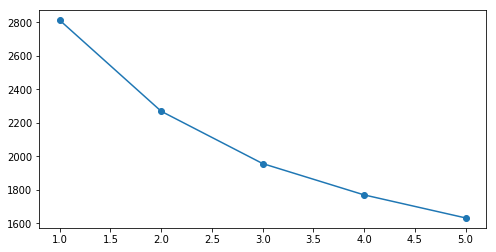

In [9]:
## looking best cluster with inertia for Kmeans first before Modeling out my SF's

cluster_range = range( 1, 6 )
cluster_errors = []

for num_clusters in cluster_range:
    cclusters = KMeans(num_clusters)
    cclusters.fit(c_scaled)
    cluster_errors.append(cclusters.inertia_)

clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors })

plt.figure(figsize=(8,4))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [10]:
# maybe 4 clusters?

In [11]:
# Want to check how the cluster performs w/ labels, centriod, intertia and silhouette_score

def performance(data, n_clusters): 
    
    performance = cluster.KMeans(n_clusters=n_clusters, random_state=42)
    performance = performance.fit(data)
    labels = performance.labels_
    centroids = performance.cluster_centers_
    inertia = performance.inertia_
    sil_score = metrics.silhouette_score(data, performance.labels_, metric='euclidean')

    data_dictionary = {
        "labels": labels,
        "centroids": centroids,
        "inertia" : inertia,
        "silhouette_score": sil_score
    }

    return data_dictionary

In [12]:
performance(c_scaled, 4)

{'labels': array([3, 0, 1, 0, 0, 3, 0, 0, 3, 3, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 3, 0,
        2, 1, 1, 3, 0, 1, 0, 1, 0, 3, 2, 1, 3, 1, 0, 1, 0, 0, 0, 3, 2, 2,
        1, 0, 2, 3, 3, 1, 2, 3, 3, 2, 1, 3, 0, 3, 0, 3, 3, 1, 3, 1, 2, 3,
        0, 1, 2, 3, 1, 1, 3, 1, 0, 0], dtype=int32),
 'centroids': array([[-3.48838087e-01, -6.31605411e-02, -3.21227530e-01,
         -4.88755583e-01, -6.18872634e-01, -5.08850689e-01,
         -3.88303527e-01, -4.35412264e-01, -4.76398052e-01,
         -4.88357030e-01, -7.34916426e-01, -3.57259944e-01,
         -1.10677459e-03,  2.24868715e-02,  5.34762660e-01,
         -6.34943238e-01,  1.81097704e-01, -6.38088266e-01,
         -3.58405861e-01, -2.76183437e-01, -3.12351727e-01,
         -6.57109887e-01,  3.75085015e-01,  3.67181569e-01,
         -1.69045209e-02, -6.29091809e-01,  3.65238498e-02,
         -6.72885253e-01, -4.76641469e-01, -4.76641469e-01,
         -2.76805711e-01,  3.13938736e-01,  1.62885931e-01,
          1.72589851e-01, -8.97264812e-02,

In [13]:
def find_best_cluster(data,a,b):

    scores = []
    for i in range(a,b):
        i_clusters = performance(data, i)
        sil_score_i = i_clusters['silhouette_score']
        scores.append(sil_score_i)

    sns.set_context('poster', font_scale=1)
    plt.plot(range(a,b), scores)
    plt.title("""Measuring Silhouette Score to Find Best Cluster""")
    print ("best silhouette score:", np.max(scores))

best silhouette score: 0.18469955062389565


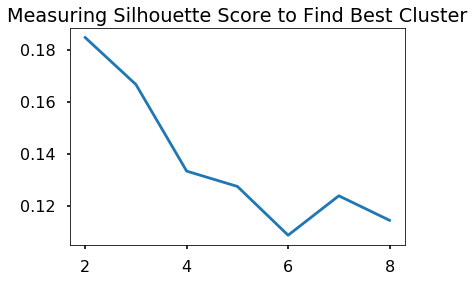

In [14]:
find_best_cluster(c_scaled,2,9)

In [15]:
## going to go with 3 clusters.

## Picking Clustering and Modeling

In [16]:
ck= KMeans(n_clusters=3, random_state=42)
ck.fit(c_scaled)
c['c_cluster'] = ck.labels_
Counter(ck.labels_)

Counter({0: 41, 2: 22, 1: 13})

In [21]:
c[c['c_cluster']==0].head()

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,Age,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,G,GS,MP,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,Pos,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,Tm,USG%,VORP,c_cluster
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Steven Adams,8.9,0.631,14.2,0.0,0.000,0.0,1.8,5.5,24,1.6,2.8,3.3,1.1,6.0,13.9,107,8.9,0.629,14.2,3.2,0.559,5.7,76,76,2487.0,2.2,7.7,16.6,125,20.6,4.3,21.1,C,1.8,1.8,2.6,13.2,13.7,15.3,0.630,OKC,16.7,3.3,0
Bam Adebayo,6.4,0.523,12.2,0.0,0.000,0.3,3.7,11.0,20,1.5,2.5,0.2,1.8,9.7,21.6,105,6.4,0.512,12.5,4.7,0.721,6.6,69,19,1368.0,-1.6,4.3,9.7,116,15.7,5.1,17.5,C,1.2,1.2,2.4,13.6,14.0,15.6,0.570,MIA,15.9,0.8,0
Jarrett Allen,7.7,0.599,12.9,0.2,0.333,0.5,1.7,5.4,19,3.0,4.6,0.2,1.4,8.2,18.2,108,7.9,0.589,13.4,3.8,0.776,5.0,72,31,1441.0,-1.3,4.9,10.5,119,17.5,5.0,19.8,C,0.9,0.9,2.8,15.1,13.1,14.3,0.636,BRK,16.3,0.8,0
Jordan Bell,6.9,0.641,10.8,0.0,0.000,0.2,6.1,16.9,23,3.3,5.5,3.7,3.7,8.8,19.0,103,6.9,0.627,11.0,1.8,0.682,2.6,57,13,809.0,0.0,3.6,8.9,121,18.0,5.5,15.6,C,2.1,2.1,3.0,20.0,12.3,14.3,0.641,GSW,13.9,1.2,0
Khem Birch,5.8,0.540,10.7,0.0,0.000,0.0,2.9,8.5,25,1.8,2.9,0.3,1.4,9.3,21.1,108,5.8,0.540,10.7,3.6,0.689,5.2,42,0,578.0,-1.1,5.9,13.2,123,16.4,4.7,15.1,C,1.3,1.3,1.8,12.1,15.2,17.1,0.582,ORL,13.2,0.3,0


In [26]:
# double checking my model predicting for one of my players.

steven = pd.DataFrame(c.loc['Steven Adams'][:43]).T.drop(columns=['Age','G','GS','MP','Pos','Tm'])
steven_scaled=ss.transform(steven)
ck.predict(steven_scaled)

array([0], dtype=int32)

In [28]:
# checks the distance from each cluster and why it got clustered to cluster 1

for i in range(0,3):
    print('dist between evan_scaled and cluster', i, ':', distance.euclidean(steven_scaled, ck.cluster_centers_[i]))

dist between evan_scaled and cluster 0 : 5.411614514975793
dist between evan_scaled and cluster 1 : 9.275364701810428
dist between evan_scaled and cluster 2 : 7.6994240599722


In [ ]:
## closest to 0

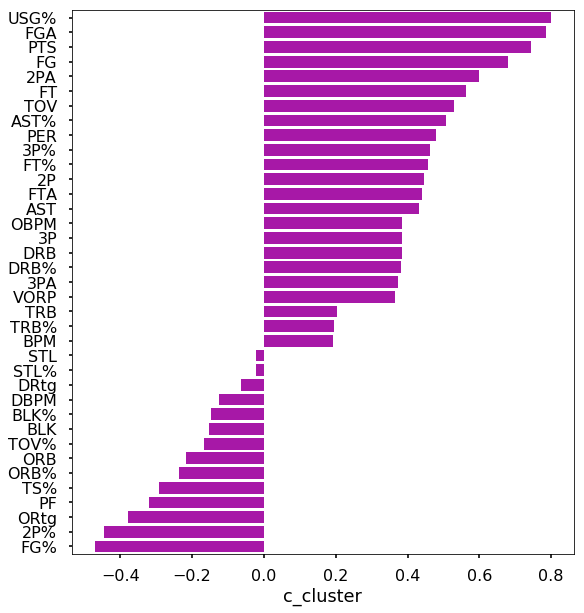

In [29]:
c_corr = c.drop(columns=['Age','G','GS','MP','Pos','Tm'])
corr=c_corr.corr()
corr = corr.sort_values('c_cluster',ascending=False)

plt.figure(figsize=(9,10))
sns.barplot(corr.c_cluster[1:], corr.index[1:], color='m')
plt.show()

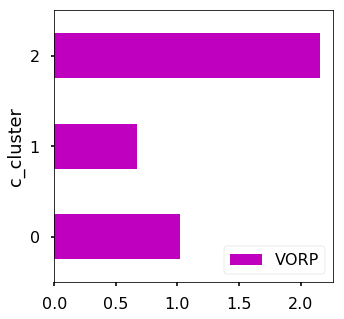

In [31]:
c_p= c[['VORP','c_cluster']]
c_p.groupby(['c_cluster']).mean().plot(kind='barh', figsize=(5,5), color='m');

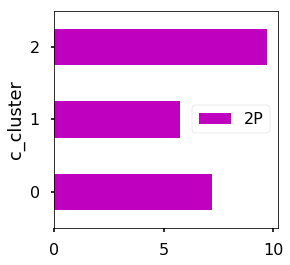

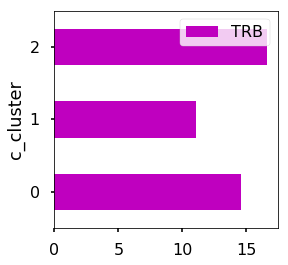

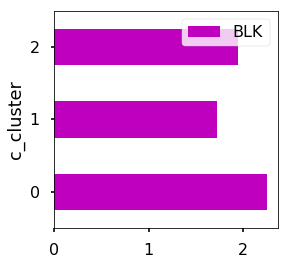

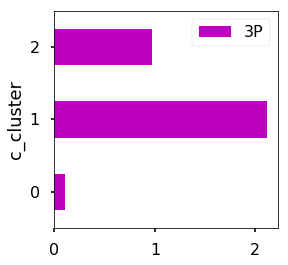

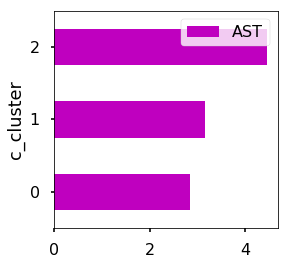

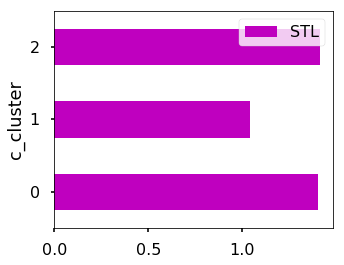

In [32]:
test1= c[['2P','c_cluster']]
test1.groupby(['c_cluster']).mean().plot(kind='barh', figsize=(4,4),color='m');

test2= c[['TRB','c_cluster']]
test2.groupby(['c_cluster']).mean().plot(kind='barh', figsize=(4,4),color='m');

test3= c[['BLK','c_cluster']]
test3.groupby(['c_cluster']).mean().plot(kind='barh', figsize=(4,4),color='m'); # DRtg seems the same

test4= c[['3P','c_cluster']]
test4.groupby(['c_cluster']).mean().plot(kind='barh', figsize=(4,4),color='m');# DRtg seems the same

test5= c[['AST','c_cluster']]
test5.groupby(['c_cluster']).mean().plot(kind='barh', figsize=(4,4),color='m'); # DRtg seems the same

c_p= c[['STL','c_cluster']]
c_p.groupby(['c_cluster']).mean().plot(kind='barh', figsize=(5,4),color='m');

In [35]:
c[c['c_cluster']==2]

,2P,2P%,2PA,3P,3P%,3PA,AST,AST%,Age,BLK,BLK%,BPM,DBPM,DRB,DRB%,DRtg,FG,FG%,FGA,FT,FT%,FTA,G,GS,MP,OBPM,ORB,ORB%,ORtg,PER,PF,PTS,Pos,STL,STL%,TOV,TOV%,TRB,TRB%,TS%,Tm,USG%,VORP,c_cluster
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LaMarcus Aldridge,13.3,0.526,25.3,0.5,0.293,1.9,3.1,11.3,32,1.8,3.0,3.3,0.3,7.8,17.3,105,13.8,0.510,27.1,6.7,0.837,8.0,75,75,2509.0,3.0,5.0,10.8,118,25.0,3.2,34.9,C,0.9,0.9,2.2,6.8,12.8,14.0,0.570,SAS,29.1,3.3,2
Willie Cauley-Stein,9.5,0.506,18.8,0.1,0.250,0.3,4.3,13.7,24,1.7,3.1,0.4,1.7,9.4,22.0,108,9.6,0.502,19.1,3.8,0.619,6.1,73,58,2044.0,-1.3,3.2,7.0,106,17.6,4.6,23.1,C,1.9,1.9,2.7,11.0,12.6,14.2,0.529,SAC,21.8,1.2,2
DeMarcus Cousins,8.3,0.530,15.7,2.9,0.354,8.1,7.1,23.0,27,2.1,3.5,5.5,3.6,14.1,30.9,102,11.2,0.470,23.7,8.1,0.746,10.8,48,48,1737.0,1.9,2.9,6.8,104,22.6,5.0,33.3,C,2.2,2.2,6.7,18.9,17.0,19.2,0.583,NOP,31.9,3.3,2
Andre Drummond,8.9,0.536,16.5,0.0,0.000,0.2,4.5,14.3,24,2.4,4.3,5.5,5.3,16.1,36.4,99,8.9,0.529,16.7,4.5,0.605,7.5,78,78,2625.0,0.2,7.6,16.4,113,22.9,4.8,22.3,C,2.2,2.2,3.8,15.9,23.7,26.2,0.555,DET,21.2,5.0,2
Joel Embiid,11.2,0.527,21.2,1.7,0.308,5.4,5.0,18.0,23,2.8,4.8,2.6,2.5,13.8,29.7,100,12.8,0.483,26.6,9.0,0.769,11.7,63,63,1912.0,0.1,3.6,8.4,106,22.9,5.3,36.3,C,1.0,1.0,5.9,15.6,17.4,19.4,0.573,PHI,33.4,2.2,2
Marc Gasol,6.8,0.456,15.0,2.3,0.341,6.7,6.4,21.7,33,2.1,3.9,1.5,1.6,10.8,25.3,108,9.1,0.420,21.7,5.9,0.834,7.1,73,73,2408.0,-0.1,1.6,3.7,104,17.4,3.9,26.4,C,1.1,1.1,4.1,14.1,12.4,14.2,0.532,MEM,25.6,2.1,2
Pau Gasol,6.8,0.481,14.1,1.2,0.358,3.3,6.6,20.1,37,2.2,3.6,3.2,3.3,13.7,30.2,102,8.0,0.458,17.5,4.4,0.756,5.8,77,63,1812.0,-0.1,3.6,7.8,112,18.9,3.4,21.6,C,0.7,0.7,3.0,13.1,17.3,19.0,0.539,SAS,20.4,2.4,2
Montrezl Harrell,13.0,0.641,20.3,0.0,0.143,0.3,2.8,10.1,24,2.0,3.4,2.4,0.0,7.6,17.0,109,13.1,0.635,20.6,5.2,0.626,8.3,76,3,1293.0,2.4,3.9,8.9,124,24.7,5.4,31.4,C,1.4,1.4,2.6,9.5,11.5,13.0,0.647,LAC,23.8,1.5,2
Willy Hernangomez,8.5,0.566,15.1,0.5,0.417,1.2,3.3,10.5,23,1.6,2.7,0.9,0.8,12.1,27.2,106,9.0,0.555,16.3,5.9,0.656,8.9,48,1,495.0,0.1,6.1,13.3,117,21.2,6.4,24.4,C,1.8,1.8,3.5,14.7,18.2,20.2,0.604,TOT,21.0,0.4,2


## Conclusion
C0 - STL, BLK, Defensive strong, Can't shoot 3's, Rebound
<br/> Defensive Bigs - Steven Adams, Rudy Gobert, Derrick Favors, Jarret Allen

C1 - 3P center, Low Steals
<br/> Stretch 5's - Dirk Nowitzki, Myles Turner, Al Horford, Brook Lopez

C2 - VORP, FG, AST, STL, TRB, offensively strong, well rounded
<br/> Modern Big's - Karl-Anthony Towns, Kevin Love, Andre Drummond, Nikola Jokic

Value
<br/> C2>C0>C1

In [39]:
trace1 = go.Scatter3d(
    x=c['3PA'],
    y=c['BLK'],
    z=c['FG'],
    mode='markers',
    marker=dict(
        size=12,
        color=c['c_cluster'],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

In [40]:
# Pickle
#from sklearn.externals import joblib

#joblib.dump(ss, './c_scaler.pk1')

#joblib.dump(ck, './c_kmeans.pk1')

In [41]:
c.to_csv('./c_cluster_17_18')